In [2]:
pip install docling

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import libraries

# docling
from docling.datamodel.base_models import FigureElement, InputFormat, Table
from docling.backend.docling_parse_backend import DoclingParseDocumentBackend
from docling.datamodel.base_models import InputFormat
from docling.document_converter import DocumentConverter
from docling_core.types.doc import ImageRefMode, PictureItem, TableItem
from docling.datamodel.pipeline_options import (
    EasyOcrOptions,
    OcrMacOptions,
    PdfPipelineOptions,
    RapidOcrOptions, 
    TesseractCliOcrOptions,
    TesseractOcrOptions,
)
# other support libraries
import time
import requests
from pathlib import Path
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

/home/parani/IBM/env1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import time

start_time = time.time()
source = "https://arxiv.org/abs/2404.12063"
converter = DocumentConverter()
result = converter.convert(source)

end_time = time.time() - start_time

print(f"Total time taken for parsing: {end_time:.2f} seconds.")
print(result.document.export_to_markdown())

Total time taken for parsing: 0.15 seconds.
<!-- image -->

<!-- image -->

Help | Advanced Search

<!-- image -->

<!-- image -->

## quick links

- Login
- Help Pages
- About

# Computer Science &gt; Machine Learning

# Title:FastVPINNs: Tensor-Driven Acceleration of VPINNs for Complex Geometries

| Comments:   | 31 pages, 19 figures, 4 algorithms                                                                                                                         |
|-------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Subjects:   | Machine Learning (cs.LG); Computational Engineering, Finance, and Science (cs.CE); Neural and Evolutionary Computing (cs.NE); Numerical Analysis (math.NA) |
| Cite as:    | arXiv:2404.12063 [cs.LG]                                                                                                                                   |
|      

In [5]:
import time
from docling.document_converter import DocumentConverter

# Start timing
start_time = time.time()

# Specify the local PDF file path
source = "paper.pdf"  # Replace with your local PDF file path

# Initialize the DocumentConverter
converter = DocumentConverter()

# Convert the local PDF
result = converter.convert(source)

# Calculate the time taken
end_time = time.time() - start_time

# Print the results
print(f"Total time taken for parsing: {end_time:.2f} seconds.")
print(result.document.export_to_markdown())

/home/parani/IBM/env1/lib/python3.10/site-packages/torch/utils/cpp_extension.py:1964: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Total time taken for parsing: 63.10 seconds.
## FastVPINNs: Tensor-Driven Acceleration of VPINNs for Complex Geometries

Thivin Anandh 1

thivinanandh@iisc.ac.in

Divij Ghose 1

divijghose@iisc.ac.in

Himanshu Jain 2

ms19026@iisermohali.ac.in

Sashikumaar Ganesan 1 ∗

sashi@iisc.ac.in

1 Department of Computational and Data Sciences

Indian Institute of Science, Bangalore

Karnataka, India

- 2 Department of Physical Sciences

Indian Institute of Science Education and Research, Mohali

Punjab, India

- ∗ Corresponding author

## Abstract

Variational Physics-Informed Neural Networks (VPINNs) utilize a variational loss function to solve partial differential equations, mirroring Finite Element Analysis techniques. Traditional hp-VPINNs, while effective for high-frequency problems, are computationally intensive and scale poorly with increasing element counts, limiting their use in complex geometries. This work introduces FastVPINNs, a tensor-based advancement that significantly reduces c

In [6]:
from docling.document_converter import PdfFormatOption  

In [7]:
IMAGE_RESOLUTION_SCALE = 2.0

input_doc_path = Path("paper.pdf")

pipeline_options = PdfPipelineOptions()
pipeline_options.images_scale = IMAGE_RESOLUTION_SCALE
pipeline_options.generate_page_images = True
pipeline_options.generate_picture_images = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.PDF: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

start_time = time.time()
conv_res = doc_converter.convert(input_doc_path)
end_time = time.time() - start_time
print(f"Total time taken for parsing: {end_time:.2f} seconds.")

Total time taken for parsing: 20.20 seconds.


In [8]:
print("Document Name :", conv_res.document.origin.filename)
print("Document Type :", conv_res.document.origin.mimetype)
print("Number of Pages :", len(conv_res.document.pages.keys()))
print("Number of text elements :", len(conv_res.document.dict()["texts"]))
print("Number of tables :", len(conv_res.document.dict()["tables"]))
print("Number of images :", len(conv_res.document.dict()["pictures"]))

Document Name : paper.pdf
Document Type : application/pdf
Number of Pages : 31
Number of text elements : 334
Number of tables : 1
Number of images : 21


/tmp/ipykernel_62692/3370206555.py:4: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print("Number of text elements :", len(conv_res.document.dict()["texts"]))
/tmp/ipykernel_62692/3370206555.py:5: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print("Number of tables :", len(conv_res.document.dict()["tables"]))
/tmp/ipykernel_62692/3370206555.py:6: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  print("Number of images :", len(conv_res.document.dict()["pictures"]))


In [9]:
results_body = conv_res.document.dict()
# dict_keys(['schema_name', 'version', 'name', 'origin', 'furniture', 'body', 'groups', 'texts', 'pictures', 'tables'])

dict_list = []
texts = results_body['texts']
for t in texts:
    ref = t['self_ref']
    text_content = t['text']
    page = t['prov'][0]['page_no']
    dict_list.append({'text_reference': ref, 'page': page, 'text_content(first 500 chars)': text_content[:500]})

df = pd.DataFrame(dict_list)
display(df)

/tmp/ipykernel_62692/50296275.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  results_body = conv_res.document.dict()


,text_reference,page,text_content(first 500 chars)
0,#/texts/0,1,arXiv:2404.12063v1 [cs.LG] 18 Apr 2024
1,#/texts/1,1,FastVPINNs: Tensor-Driven Acceleration of VPIN...
2,#/texts/2,1,Thivin Anandh 1
3,#/texts/3,1,thivinanandh@iisc.ac.in
4,#/texts/4,1,Divij Ghose 1
...,...,...,...
329,#/texts/329,31,10-1
330,#/texts/330,31,10-2
331,#/texts/331,31,10-3
332,#/texts/332,31,X105


In [10]:
tables = results_body["tables"]
dict_list = []
for t in tables:
    ref = t["self_ref"]
    page = t["prov"][0]['page_no']
    table_captions = t["captions"]
    if len(table_captions) and 'cref' in table_captions[0].keys():
        table_caption = table_captions[0]["cref"]
    else:
        table_caption = "No Caption"
    table_data = str(t["data"])[:100]
    dict_list.append({"table_reference": ref, "page": page, "table_caption": table_caption, "table_data(first 100 chars)": table_data})

df = pd.DataFrame(dict_list)
display(df)

,table_reference,page,table_caption,table_data(first 100 chars)
0,#/tables/0,31,#/texts/321,{'table_cells': [{'bbox': {'l': 234.3170013427...


In [11]:
images = results_body["pictures"]
dict_list = []
for i in images:
    ref = i['self_ref']
    page = i['prov'][0]['page_no']
    image_captions = i['captions']
    if len(image_captions) and 'cref' in image_captions[0].keys():
        image_caption = image_captions[0]['cref']
    else:
        image_caption = "No Caption"
    image_data = str(i['image'])[:180]
    dict_list.append({"image_reference": ref, "page": page, "image_caption": image_caption, "image_data(first 180 chars)": image_data})

df = pd.DataFrame(dict_list)
display(df)

,image_reference,page,image_caption,image_data(first 180 chars)
0,#/pictures/0,7,#/texts/96,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
1,#/pictures/1,8,#/texts/105,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
2,#/pictures/2,8,#/texts/106,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
3,#/pictures/3,9,#/texts/116,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
4,#/pictures/4,11,#/texts/134,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
5,#/pictures/5,12,#/texts/148,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
6,#/pictures/6,14,#/texts/165,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
7,#/pictures/7,15,#/texts/171,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
8,#/pictures/8,16,#/texts/177,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."
9,#/pictures/9,17,#/texts/186,"{'mimetype': 'image/png', 'dpi': 144, 'size': ..."


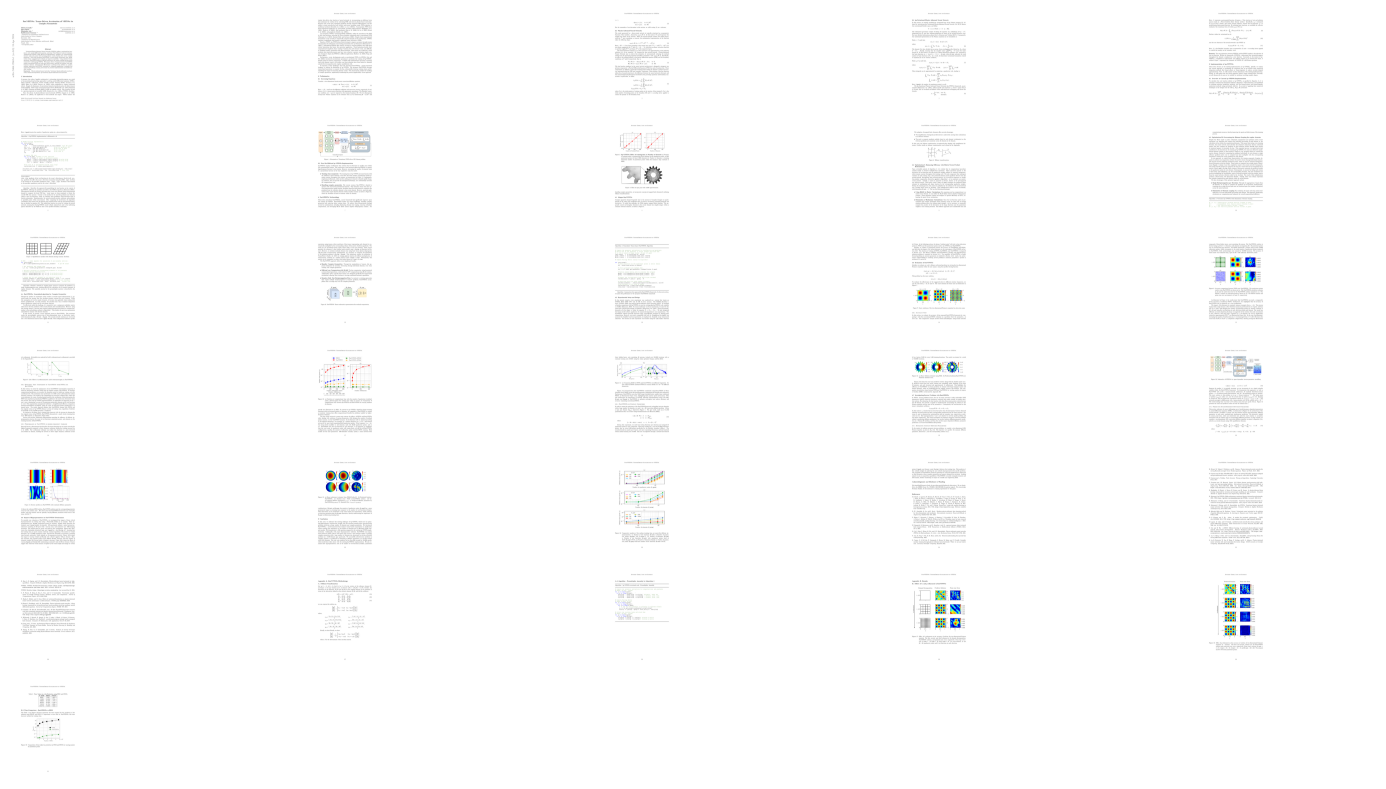

In [12]:
# # Display the pages
def display_images(images, images_per_row=5, figsize=(15, 8)):

    # Handle dictionary or list input
    if isinstance(images, dict):
        images = list(images.values())

    # Calculate number of rows needed
    num_rows = math.ceil(len(images) / images_per_row)

    # Create subplots
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=figsize)
    axes = axes.flatten()  # Flatten axes for easier iteration

    # Plot images
    for ax, image in zip(axes, images):
        ax.imshow(image)
        ax.axis('off')

    # Turn off unused axes
    for ax in axes[len(images):]:
        ax.axis('off')

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
# Generate page images dictionary
page_images = {page_no: page.image.pil_image for page_no, page in conv_res.document.pages.items()}

# Display images (paginated)
display_images(page_images, images_per_row=5, figsize=(15, 8))


In [13]:
# Save page images to a local directory
dir_path = "./pages"

os.makedirs(dir_path, exist_ok=True)

for page_no, page in conv_res.document.pages.items():
    page_no = page.page_no
    page_image_filename = f"{page_no}.png"

    with open(os.path.join(dir_path, page_image_filename), "wb") as fp:  # Use the built-in open() function
        page.image.pil_image.save(fp, format="PNG")


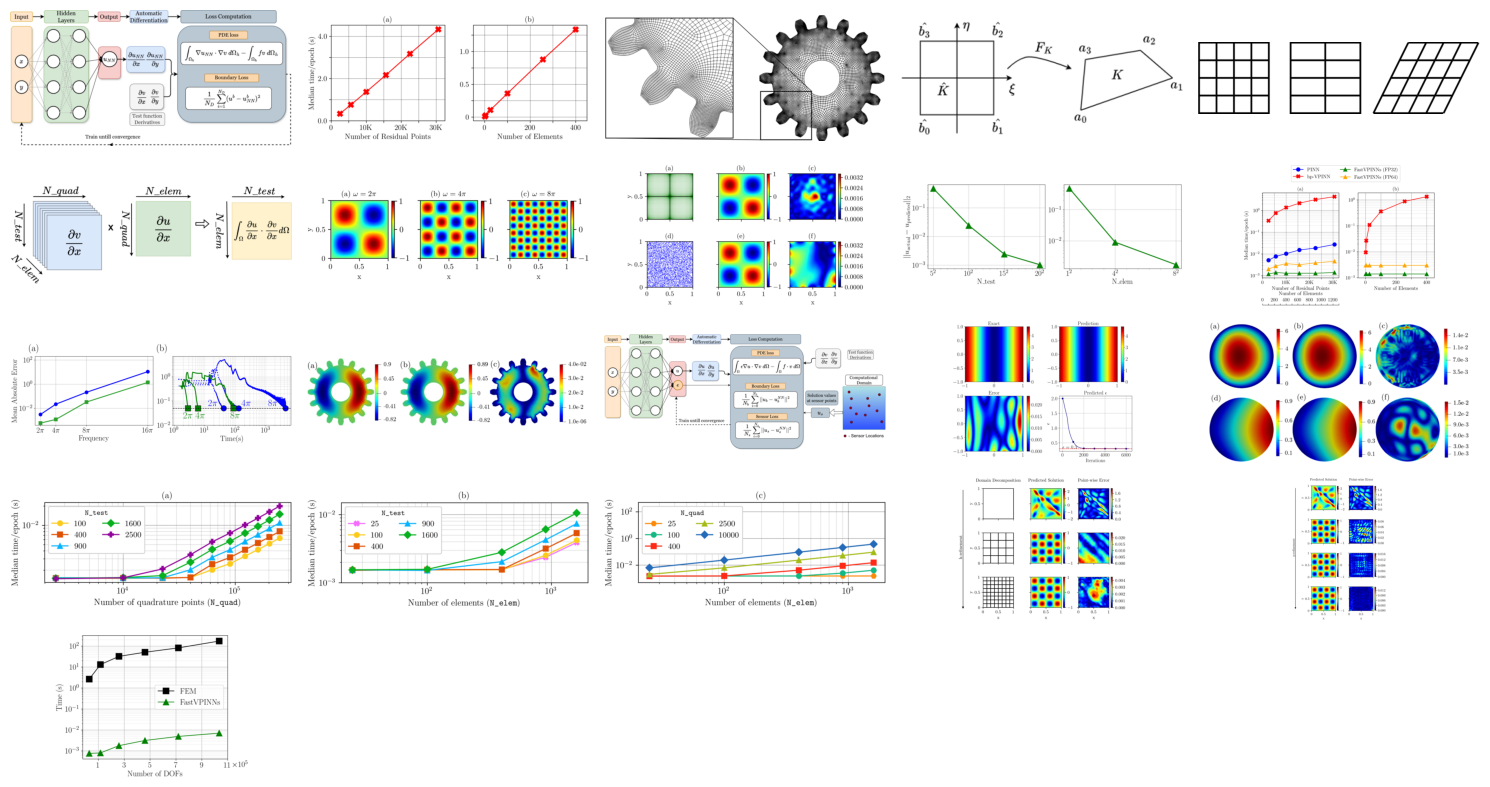

In [14]:
# Set the directory to save images
dir_path = "./images"
os.makedirs(dir_path, exist_ok=True)

images_list = []
image_number = 1

# Iterate through document elements and process images
for element, _level in conv_res.document.iterate_items():
    if isinstance(element, PictureItem):
        element_image_filename = os.path.join(dir_path, str(image_number)) + ".png"

        with open(element_image_filename, "wb") as fp:
            # Get the image and save it
            image = element.get_image(conv_res.document)
            image.save(fp, "PNG")

        images_list.append(image)
        image_number += 1

# Display the images
display_images(images_list, images_per_row=5, figsize=(15, 8))


In [15]:
dir_path = "./tables"
dir_paths = ["./tables/images", "./tables/CSVs", "./tables/HTMLs"]
[os.makedirs(path, exist_ok=True) for path in dir_paths]

table_list = []
table_number = 1

for element, _level in conv_res.document.iterate_items():

    if isinstance(element, TableItem):

        # Saving tables as images
        element_table_filename = os.path.join(dir_path, "images", str(table_number)) + ".png"
        with open(element_table_filename, "wb") as fp:
            table_image = element.get_image(conv_res.document)
            table_image.save(fp, "PNG")
            table_list.append(table_image)

        # Saving tables as CSV files
        table_df: pd.DataFrame = element.export_to_dataframe()
        element_table_filename = os.path.join(dir_path, "CSVs", str(table_number)) + ".csv"
        table_df.to_csv(element_table_filename)

        # Saving tables as HTML files
        table_html = element.export_to_html()
        element_table_filename = os.path.join(dir_path, "HTMLs", str(table_number)) + ".html"
        with open(element_table_filename, "w") as fp:
            fp.write(table_html)

        table_number += 1


In [16]:
pip install pytesseract


Note: you may need to restart the kernel to use updated packages.


In [17]:
from docling.datamodel.base_models import Table
from docling.datamodel.base_models import InputFormat
from docling_core.types.doc import PictureItem  # Ensure this is correct in your version of Docling

# Initialize the formula list
formula_list = []
formula_number = 1

# Iterate through the document's items
for element, _level in conv_res.document.iterate_items():
    # If the element is a PictureItem (assuming formulas are images)
    if isinstance(element, PictureItem):
        # Save the image (formula)
        formula_filename = os.path.join(dir_path, f"formula_{formula_number}.png")

        with open(formula_filename, "wb") as fp:
            formula_image = element.get_image(conv_res.document)  # Adjust depending on available methods
            formula_image.save(fp, "PNG")

        formula_list.append(formula_image)
        formula_number += 1


In [18]:
pip install "pix2tex[gui]"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 550.5/550.5 kB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.6/160.6 MB 41.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 MB 41.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 MB 41.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.2/105.2 MB 4.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 26.2 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.2-py3-none-any.whl size=140968 sha256=3bd2a

In [19]:
!apt-get install -y poppler-utils


E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [20]:
!apt-get update
!apt-get install -y tesseract-ocr


Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [22]:
# Install Poppler and Tesseract
!apt-get update
!apt-get install -y poppler-utils tesseract-ocr


Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [23]:
pip install pdf2image

Note: you may need to restart the kernel to use updated packages.


In [3]:
!apt-get update
!apt-get install -y tesseract-ocr


Reading package lists... Done
E: Could not open lock file /var/lib/apt/lists/lock - open (13: Permission denied)
E: Unable to lock directory /var/lib/apt/lists/
W: Problem unlinking the file /var/cache/apt/pkgcache.bin - RemoveCaches (13: Permission denied)
W: Problem unlinking the file /var/cache/apt/srcpkgcache.bin - RemoveCaches (13: Permission denied)
E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?


In [4]:
import pytesseract

# Set the path to the Tesseract executable explicitly in Colab
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [18]:
import pytesseract
from PIL import Image
from pdf2image import convert_from_path
import os
import re

# Set Tesseract path explicitly (if needed)
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'  # Ubuntu default path

# Convert PDF to images (one image per page)
pages = convert_from_path("paper.pdf", 300)

# Directory to save extracted LaTeX equations
dir_path = "./formulas"
os.makedirs(dir_path, exist_ok=True)

# Function to detect formulas (looking for math symbols, functions, and math-related expressions)
def is_formula(line):
    # Regular expression to match common math symbols, variables, functions, and operations
    math_symbols = r'[0-9\+\-\*/\=\^\.]|\b(sin|cos|exp|log|sqrt|tan|sum|int|frac|log|e)\b|\([a-zA-Z0-9,\^\+\-\*/\=\.\(\)]+\)'
    return bool(re.search(math_symbols, line))

# Iterate over each page image and extract LaTeX formulas using pytesseract
for page_number, page in enumerate(pages, 1):
    # Save the page as an image
    image_path = os.path.join(dir_path, f"page_{page_number}.png")
    page.save(image_path, 'PNG')

    # Perform OCR on the image to extract text
    text = pytesseract.image_to_string(page, config='--psm 6')

    # Split the text into lines and check if they contain formulas
    for line_number, line in enumerate(text.splitlines(), 1):
        if is_formula(line):  # If the line contains a formula
            formula_filename = os.path.join(dir_path, f"formula_{page_number}_{line_number}.txt")
            with open(formula_filename, 'w') as file:
                file.write(line)

# Check the formulas extracted
os.listdir(dir_path)


KeyboardInterrupt: 